<a href="https://colab.research.google.com/github/Sandikass/Energy-Consumption-in-Steel-Industry/blob/main/Energy_Usage_in_Steel_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Cnsumption in Steel Industry for A year 2018 on hourly basis

This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr).

Here, I done data analysis of energy consumption by steel industry which is on houly basis for a year.  Energy consumption data is analysed for the yearly, mothly ,week and quarter for the given year.

In [1]:
!git clone https://github.com/Sandikass/Energy-Consumption-in-Steel-Industry.git


Cloning into 'Energy-Consumption-in-Steel-Industry'...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
color_pal=sns.color_palette()


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Steel industry energy consumption kwh.csv')

In [4]:
df.head()

,Datetime,Usage_kWh
0,01-01-2018 00:15,3.17
1,01-01-2018 00:30,4.00
2,01-01-2018 00:45,3.24
3,01-01-2018 01:00,3.31
4,01-01-2018 01:15,3.82


In [5]:
df=df.set_index('Datetime')

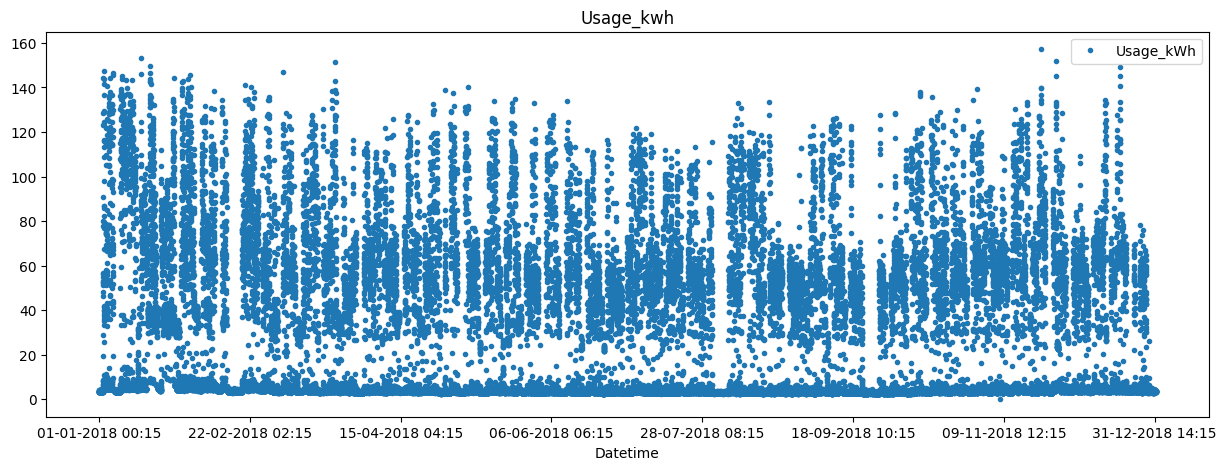

In [6]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Usage_kwh' )
plt.show()

In [7]:
df.index

Index(['01-01-2018 00:15', '01-01-2018 00:30', '01-01-2018 00:45',
       '01-01-2018 01:00', '01-01-2018 01:15', '01-01-2018 01:30',
       '01-01-2018 01:45', '01-01-2018 02:00', '01-01-2018 02:15',
       '01-01-2018 02:30',
       ...
       '31-12-2018 21:45', '31-12-2018 22:00', '31-12-2018 22:15',
       '31-12-2018 22:30', '31-12-2018 22:45', '31-12-2018 23:00',
       '31-12-2018 23:15', '31-12-2018 23:30', '31-12-2018 23:45',
       '31-12-2018 00:00'],
      dtype='object', name='Datetime', length=35040)

Datetime which is in object type changed to datetime

In [8]:
df.index=pd.to_datetime(df.index)

# train/ test split

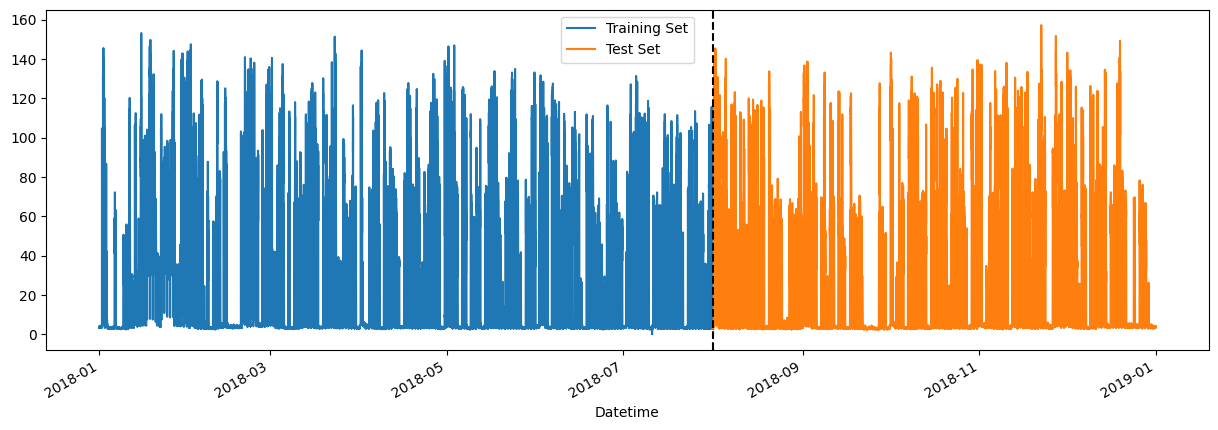

In [9]:
train=df.loc[df.index<'2018-08-01']
test=df.loc[df.index>='2018-08-01']
fig, ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Test set')
ax.axvline('2018-08-01',color='black',ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

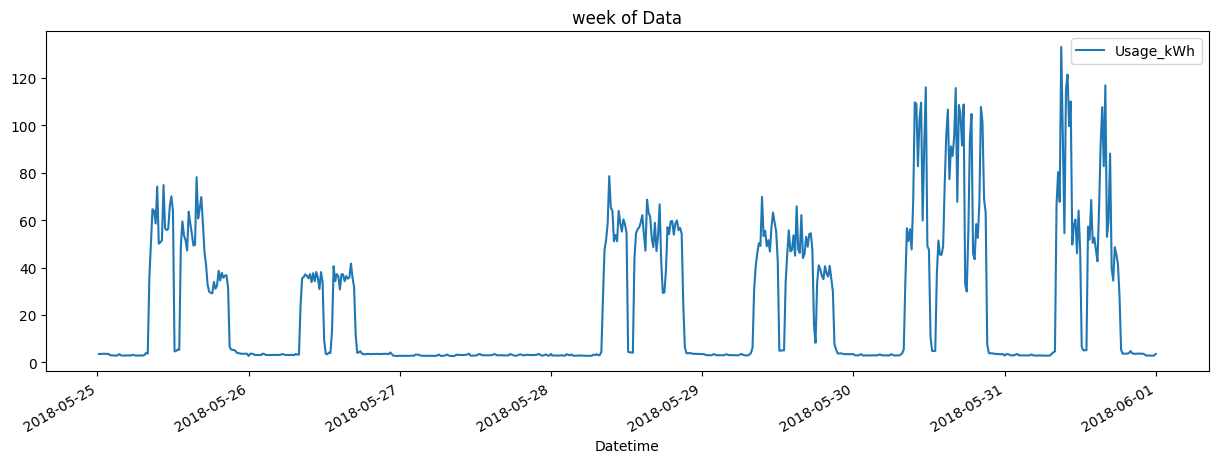

In [10]:
df.loc[(df.index >'2018-05-25')&(df.index<='2018-06-01')].plot(figsize=(15,5), title='week of Data')
plt.show()

In [11]:
def create_features(df):
    """
    create time series features
    """
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df


In [12]:
df=create_features(df)

# Visulalization of features/ target relationship

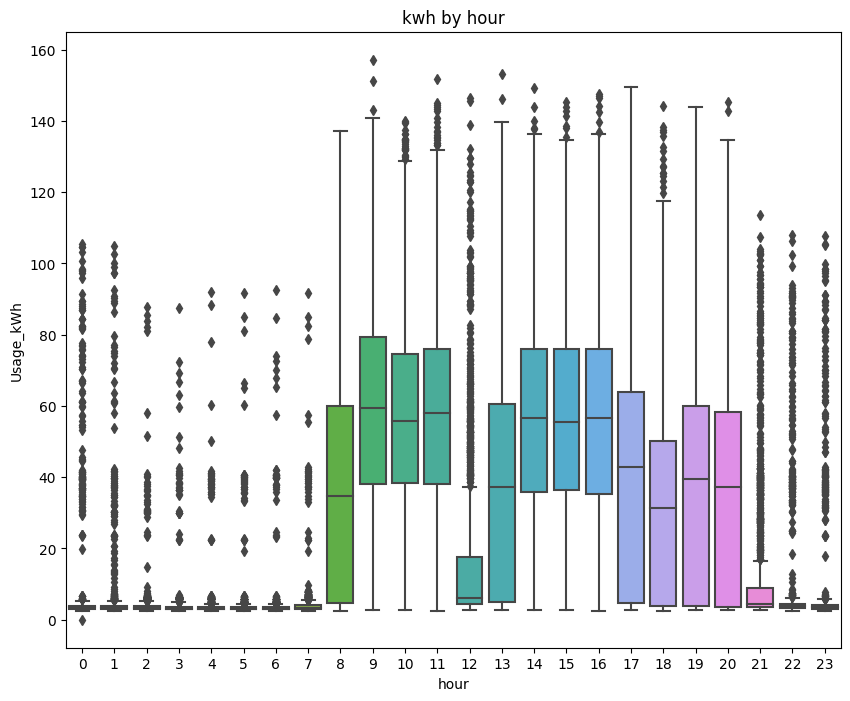

In [13]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour',y='Usage_kWh')
ax.set_title('kwh by hour')
plt.show()

here we see that energy usage start by morning 8 am which in max amount , at lunch time low energy used and after lunch time energry usage my steel industry incresed till night 9 pm.

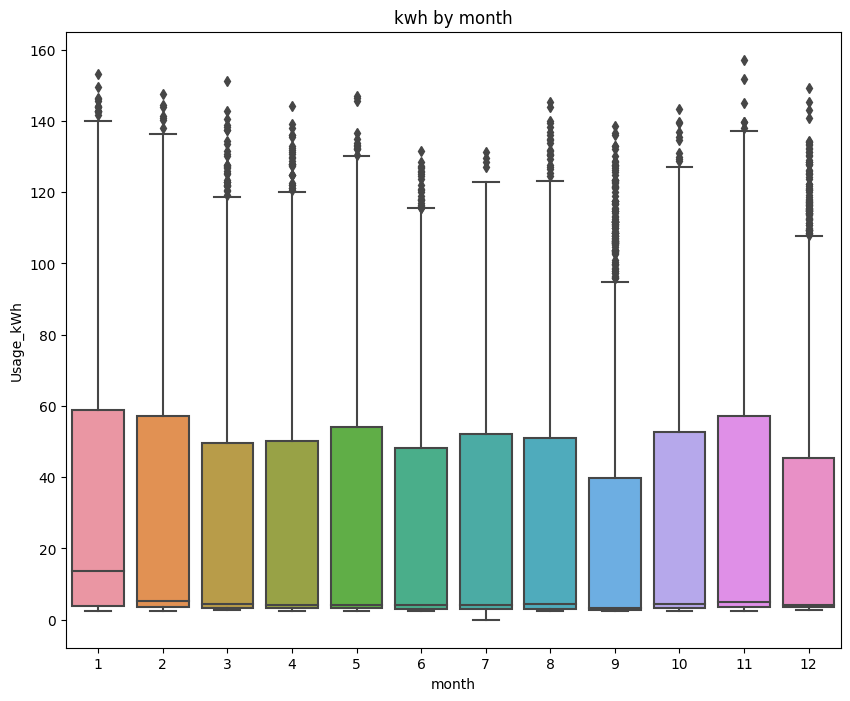

In [14]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month',y='Usage_kWh')
ax.set_title('kwh by month')
plt.show()

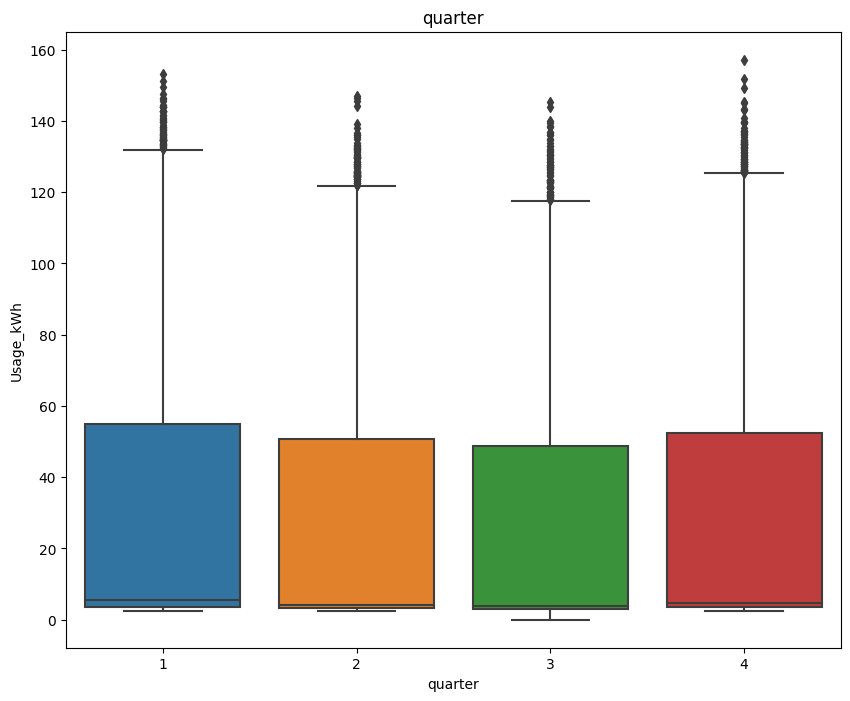

In [15]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='quarter',y='Usage_kWh')
ax.set_title('quarter')
plt.show()

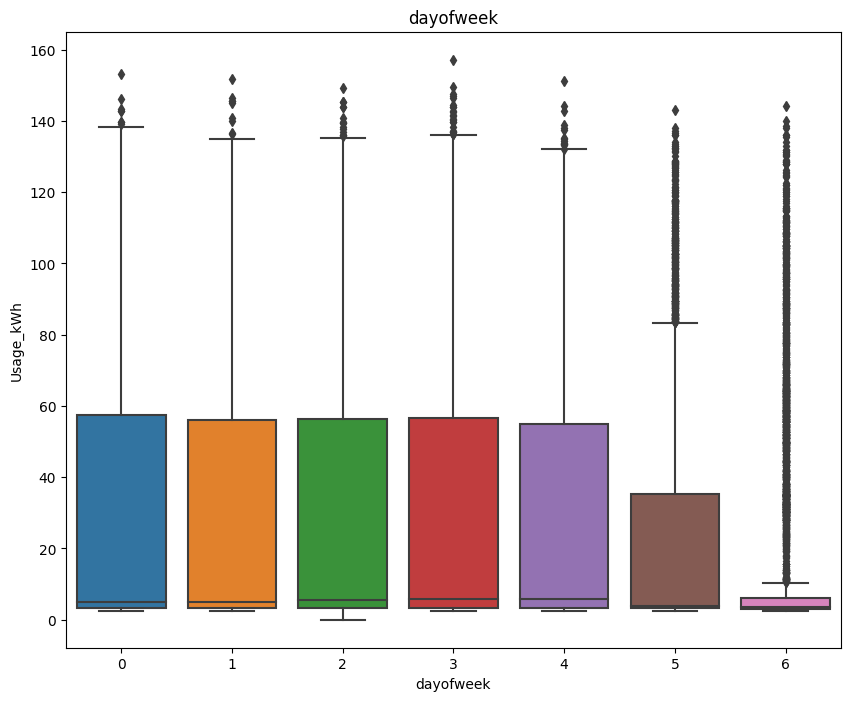

In [16]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='dayofweek',y='Usage_kWh')
ax.set_title('dayofweek')
plt.show()

In [ ]:
train=create_features(train)
test=create_features(test)

In [19]:
FEATURES=['hour','month' ,'quarter', 'dayofweek']
TARGET=['Usage_kWh']
X_train=train[FEATURES]
y_train=train[TARGET]
X_test=test[FEATURES]
y_test=test[TARGET]
reg=xgb.XGBRegressor(N_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
reg.fit(X_train,y_train,
      eval_set=[(X_train,y_train), (X_test,y_test)],
        verbose=100)

[0]	validation_0-rmse:33.56098	validation_1-rmse:32.93796


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:24:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "N_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[99]	validation_0-rmse:26.08441	validation_1-rmse:25.27662


XGBRegressor(N_estimators=1000, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [20]:
fi=pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_, columns=['importance'])

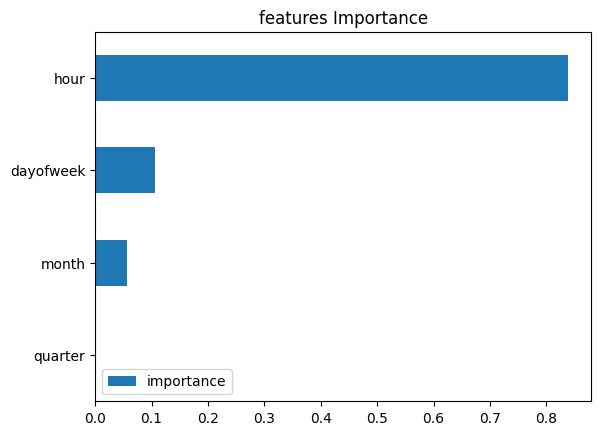

In [21]:
fi.sort_values('importance').plot(kind='barh',title='features Importance')
plt.show()

# Forcast on Test

<ipython-input-22-be49dbba536d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


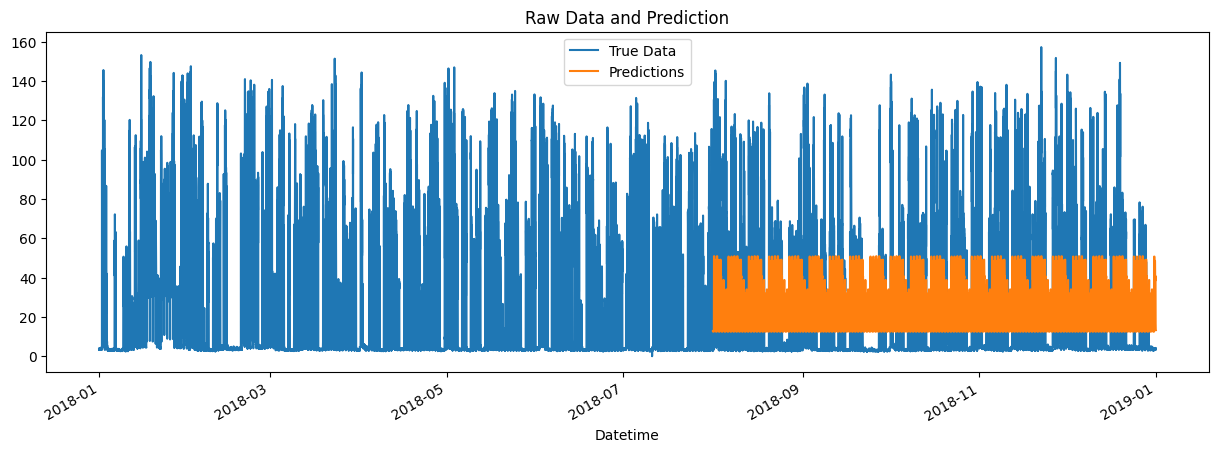

In [22]:
test['prediction'] = reg.predict(X_test)

# Merge the 'prediction' column from the 'test' DataFrame into the 'df' DataFrame
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

# Create a plot with both 'Usage_kWh' and 'prediction'
ax = df[['Usage_kWh', 'prediction']].plot(figsize=(15, 5))
ax.set_title('Raw Data and Prediction')
plt.legend(['True Data', 'Predictions'])
plt.show()

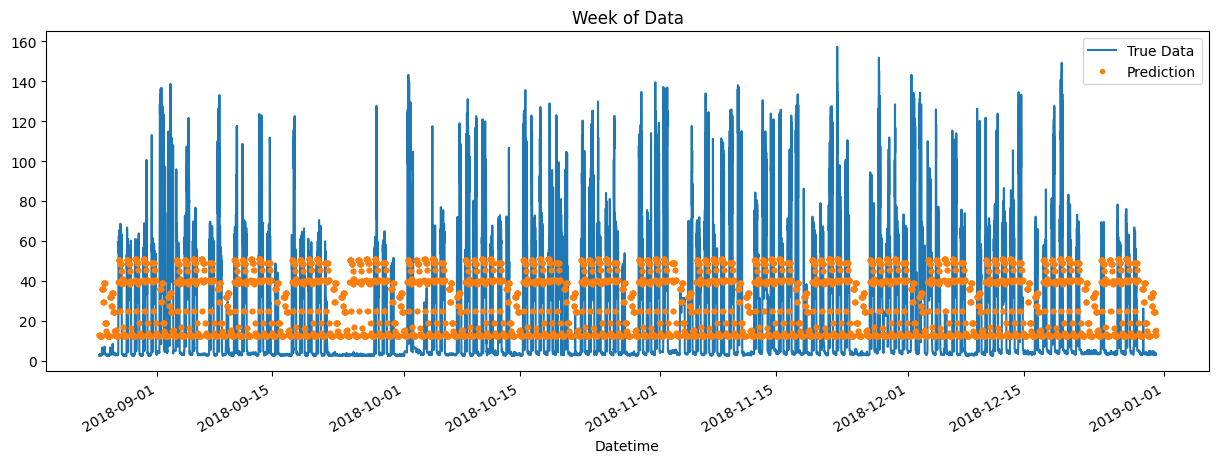

In [23]:
# Filter the DataFrame for the specified date range
filtered_df = df.loc[(df.index > '2018-08-25') & (df.index <= '2018-12-31')]

# Create a plot for 'Usage_kWh' in the specified date range
ax = filtered_df['Usage_kWh'].plot(figsize=(15, 5), title='Week of Data')

# Plot the 'prediction' values for the same date range
filtered_df['prediction'].plot(ax=ax, style='.')

# Add legend
plt.legend(['True Data', 'Prediction'])
plt.show()
